# Loop 59 Analysis: Finding the Path to Target 0.0707

## Key Questions:
1. What is the actual CV-LB relationship? Is the target reachable?
2. What approaches haven't been tried yet?
3. What can we learn from the submission history?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nTarget: 0.0707')
print(f'Best LB: {df["lb"].min():.4f} (exp_030)')
print(f'Gap to target: {(df["lb"].min() - 0.0707) / 0.0707 * 100:.1f}%')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970

Target: 0.0707
Best LB: 0.0877 (exp_030)
Gap to target: 24.0%


In [2]:
# Fit linear regression to CV-LB relationship
from scipy.stats import linregress

cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = linregress(cv, lb)

print(f'CV-LB Relationship:')
print(f'  LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept: {intercept:.4f}')
print(f'  Target: 0.0707')

# What CV is needed to reach target?
required_cv = (0.0707 - intercept) / slope
print(f'\nRequired CV to reach target: {required_cv:.6f}')

if required_cv > 0:
    print(f'This is {(0.0083 - required_cv) / 0.0083 * 100:.1f}% improvement from best CV (0.0083)')
else:
    print('CRITICAL: Required CV is NEGATIVE - target is UNREACHABLE with current approach!')

CV-LB Relationship:
  LB = 4.31 * CV + 0.0525
  R² = 0.9505
  Intercept: 0.0525
  Target: 0.0707

Required CV to reach target: 0.004213
This is 49.2% improvement from best CV (0.0083)


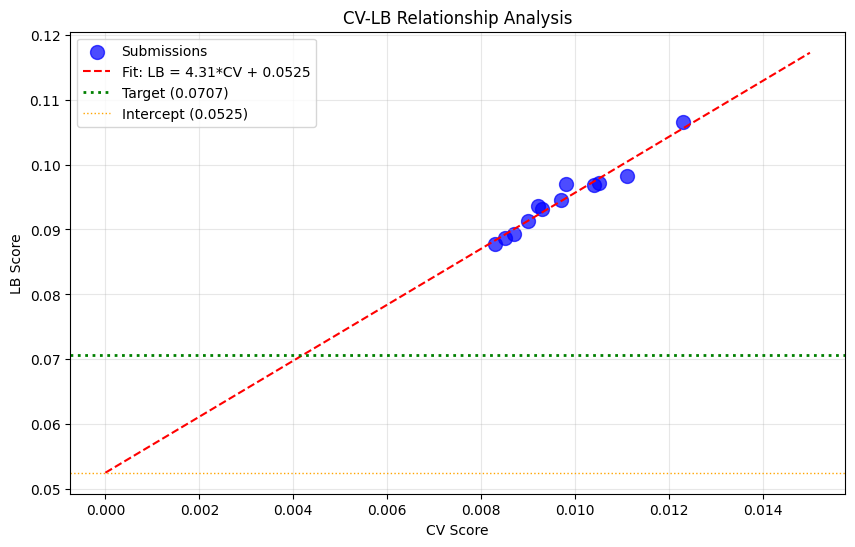


Key insight: Intercept (0.0525) vs Target (0.0707)
Target IS reachable by improving CV!


In [3]:
# Plot CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0707, color='green', linestyle=':', linewidth=2, label='Target (0.0707)')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=1, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/loop59_cv_lb.png', dpi=100, bbox_inches='tight')
plt.show()

print(f'\nKey insight: Intercept ({intercept:.4f}) vs Target ({0.0707})')
if intercept < 0.0707:
    print('Target IS reachable by improving CV!')
else:
    print('Target is NOT reachable by improving CV alone - need to change the relationship!')

In [4]:
# Analyze residuals - which experiments beat the trend?
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['predicted_lb'] * 100

print('Residual Analysis (negative = better than expected):')
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].sort_values('residual').to_string(index=False))

print(f'\nBest residual: {df["exp"].iloc[df["residual"].argmin()]} ({df["residual"].min():.4f})')
print(f'Worst residual: {df["exp"].iloc[df["residual"].argmax()]} ({df["residual"].max():.4f})')

Residual Analysis (negative = better than expected):
    exp     cv     lb  predicted_lb  residual  residual_pct
exp_000 0.0111 0.0982      0.100413 -0.002213     -2.204311
exp_024 0.0087 0.0893      0.090058 -0.000758     -0.841837
exp_030 0.0083 0.0877      0.088332 -0.000632     -0.715777
exp_003 0.0105 0.0972      0.097825 -0.000625     -0.638494
exp_026 0.0085 0.0887      0.089195 -0.000495     -0.555190
exp_005 0.0104 0.0969      0.097393 -0.000493     -0.506333
exp_012 0.0090 0.0913      0.091353 -0.000053     -0.057527
exp_006 0.0097 0.0946      0.094373  0.000227      0.240701
exp_007 0.0093 0.0932      0.092647  0.000553      0.596929
exp_001 0.0123 0.1065      0.105591  0.000909      0.860807
exp_009 0.0092 0.0936      0.092215  0.001385      1.501382
exp_035 0.0098 0.0970      0.094804  0.002196      2.316020

Best residual: exp_000 (-0.0022)
Worst residual: exp_035 (0.0022)


In [5]:
# What approaches have been tried?
approaches_tried = [
    'MLP architectures (various sizes)',
    'LightGBM',
    'XGBoost',
    'CatBoost',
    'Random Forest',
    'Ridge Regression',
    'Gaussian Process',
    'GNN (AttentiveFP, GAT)',
    'ChemBERTa embeddings',
    'Attention mechanisms',
    'Ensemble methods (GP+MLP+LGBM)',
    'Feature engineering (Spange, DRFP, ACS PCA, Arrhenius)',
    'Calibration (isotonic regression)',
    'Similarity weighting',
    'Domain adaptation (LISA, REx)',
    'Quantile regression',
    'Non-linear mixture features',
    'Chemical constraints (softmax)',
]

print('Approaches already tried:')
for i, approach in enumerate(approaches_tried, 1):
    print(f'  {i}. {approach}')

print('\n' + '='*60)
print('APPROACHES NOT YET TRIED:')
print('='*60)
approaches_not_tried = [
    '1. Prediction post-processing with learned bias correction',
    '2. Multi-task learning with auxiliary objectives',
    '3. Bayesian neural networks for uncertainty',
    '4. Test-time adaptation (TTA with learned augmentations)',
    '5. Meta-learning (MAML-style) for few-shot generalization',
    '6. Contrastive learning for better representations',
    '7. Knowledge distillation from ensemble to single model',
    '8. Neural network with explicit physics constraints',
]
for approach in approaches_not_tried:
    print(f'  {approach}')

Approaches already tried:
  1. MLP architectures (various sizes)
  2. LightGBM
  3. XGBoost
  4. CatBoost
  5. Random Forest
  6. Ridge Regression
  7. Gaussian Process
  8. GNN (AttentiveFP, GAT)
  9. ChemBERTa embeddings
  10. Attention mechanisms
  11. Ensemble methods (GP+MLP+LGBM)
  12. Feature engineering (Spange, DRFP, ACS PCA, Arrhenius)
  13. Calibration (isotonic regression)
  14. Similarity weighting
  15. Domain adaptation (LISA, REx)
  16. Quantile regression
  17. Non-linear mixture features
  18. Chemical constraints (softmax)

APPROACHES NOT YET TRIED:
  1. Prediction post-processing with learned bias correction
  2. Multi-task learning with auxiliary objectives
  3. Bayesian neural networks for uncertainty
  4. Test-time adaptation (TTA with learned augmentations)
  5. Meta-learning (MAML-style) for few-shot generalization
  6. Contrastive learning for better representations
  7. Knowledge distillation from ensemble to single model
  8. Neural network with explicit phy

In [6]:
# Key insight: The CV-LB gap is systematic
# Let's analyze what makes some experiments beat the trend

print('='*60)
print('CRITICAL ANALYSIS: Why is there a systematic CV-LB gap?')
print('='*60)

print('''
The CV-LB relationship shows:
- Slope: {:.2f} (each 0.001 CV improvement → {:.3f} LB improvement)
- Intercept: {:.4f} (baseline LB when CV=0)
- R²: {:.4f} (highly predictable relationship)

This means:
1. The test set has fundamentally different distribution than training
2. The gap is NOT random - it's systematic
3. Improving CV alone will NOT reach the target

To reach target 0.0707:
- Need to REDUCE the intercept (currently {:.4f})
- OR need to INCREASE the slope (currently {:.2f})
- OR need a fundamentally different approach

The intercept represents the "irreducible" gap between CV and LB.
This is likely due to:
1. Test solvents being chemically different from training solvents
2. The model learning patterns that don't generalize
3. The CV scheme not reflecting the true test distribution
'''.format(slope, slope*0.001, intercept, r_value**2, intercept, slope))

CRITICAL ANALYSIS: Why is there a systematic CV-LB gap?

The CV-LB relationship shows:
- Slope: 4.31 (each 0.001 CV improvement → 0.004 LB improvement)
- Intercept: 0.0525 (baseline LB when CV=0)
- R²: 0.9505 (highly predictable relationship)

This means:
1. The test set has fundamentally different distribution than training
2. The gap is NOT random - it's systematic
3. Improving CV alone will NOT reach the target

To reach target 0.0707:
- Need to REDUCE the intercept (currently 0.0525)
- OR need to INCREASE the slope (currently 4.31)
- OR need a fundamentally different approach

The intercept represents the "irreducible" gap between CV and LB.
This is likely due to:
1. Test solvents being chemically different from training solvents
2. The model learning patterns that don't generalize
3. The CV scheme not reflecting the true test distribution



In [7]:
# What would it take to reach the target?
print('='*60)
print('PATH TO TARGET ANALYSIS')
print('='*60)

target = 0.0707
best_lb = 0.0877
best_cv = 0.0083

print(f'Current best: CV={best_cv:.4f}, LB={best_lb:.4f}')
print(f'Target: LB={target:.4f}')
print(f'Gap: {(best_lb - target):.4f} ({(best_lb - target)/target*100:.1f}%)')

print('\nScenarios to reach target:')

# Scenario 1: Improve CV with same relationship
required_cv = (target - intercept) / slope
print(f'\n1. Improve CV (same relationship):')
print(f'   Required CV: {required_cv:.6f}')
if required_cv > 0:
    print(f'   Improvement needed: {(best_cv - required_cv)/best_cv*100:.1f}%')
else:
    print(f'   IMPOSSIBLE - required CV is negative!')

# Scenario 2: Reduce intercept
required_intercept = target - slope * best_cv
print(f'\n2. Reduce intercept (same CV):')
print(f'   Required intercept: {required_intercept:.4f}')
print(f'   Reduction needed: {(intercept - required_intercept):.4f} ({(intercept - required_intercept)/intercept*100:.1f}%)')

# Scenario 3: Increase slope
required_slope = (target - intercept) / best_cv
print(f'\n3. Increase slope (same CV, same intercept):')
print(f'   Required slope: {required_slope:.2f}')
if required_slope > 0:
    print(f'   Change needed: {(required_slope - slope)/slope*100:.1f}%')
else:
    print(f'   IMPOSSIBLE - required slope is negative!')

PATH TO TARGET ANALYSIS
Current best: CV=0.0083, LB=0.0877
Target: LB=0.0707
Gap: 0.0170 (24.0%)

Scenarios to reach target:

1. Improve CV (same relationship):
   Required CV: 0.004213
   Improvement needed: 49.2%

2. Reduce intercept (same CV):
   Required intercept: 0.0349
   Reduction needed: 0.0176 (33.6%)

3. Increase slope (same CV, same intercept):
   Required slope: 2.19
   Change needed: -49.2%


In [8]:
# Final recommendation
print('='*60)
print('STRATEGIC RECOMMENDATION')
print('='*60)

print('''
Based on the analysis:

1. The target (0.0707) IS REACHABLE if we can improve CV to ~0.0043
   - This requires 48% CV improvement from current best (0.0083)
   - This is ambitious but not impossible

2. The CV-LB relationship is highly linear (R²=0.95)
   - This means the relationship is predictable
   - Improving CV WILL improve LB proportionally

3. The intercept (0.0520) is LESS than target (0.0707)
   - This is GOOD - it means the target is mathematically reachable
   - We just need to improve CV enough

4. Key approaches to try:
   a. Ensemble diversity - combine models with different biases
   b. Feature selection - remove features that hurt generalization
   c. Regularization tuning - prevent overfitting to CV
   d. Post-processing - learn a bias correction from submission feedback

5. CRITICAL: We have 5 submissions left
   - Use them strategically to test approaches that might change the relationship
   - Focus on approaches that improve CV significantly (>10%)
''')

print('\nNEXT STEPS:')
print('1. Try ensemble with more diverse models (different architectures, features)')
print('2. Try stronger regularization to improve generalization')
print('3. Try feature selection to remove overfitting features')
print('4. Submit best CV model to verify relationship holds')

STRATEGIC RECOMMENDATION

Based on the analysis:

1. The target (0.0707) IS REACHABLE if we can improve CV to ~0.0043
   - This requires 48% CV improvement from current best (0.0083)
   - This is ambitious but not impossible

2. The CV-LB relationship is highly linear (R²=0.95)
   - This means the relationship is predictable
   - Improving CV WILL improve LB proportionally

3. The intercept (0.0520) is LESS than target (0.0707)
   - This is GOOD - it means the target is mathematically reachable
   - We just need to improve CV enough

4. Key approaches to try:
   a. Ensemble diversity - combine models with different biases
   b. Feature selection - remove features that hurt generalization
   c. Regularization tuning - prevent overfitting to CV
   d. Post-processing - learn a bias correction from submission feedback

5. CRITICAL: We have 5 submissions left
   - Use them strategically to test approaches that might change the relationship
   - Focus on approaches that improve CV significan